In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [17]:
input_o = './test_images/Screenshot_2021-01-14_21-48-47.png'

inputs = [
    './test_images/Screenshot_2021-01-14_21-49-19.png',
    './test_images/Screenshot_2021-01-14_21-50-03.png',
    './test_images/Screenshot_2021-01-14_21-50-31.png',
    './test_images/Screenshot_2021-01-14_22-57-58.png',
    './test_images/Screenshot_2021-01-14_22-58-19.png',
    './test_images/Screenshot_2021-01-14_22-58-49.png'
         ]

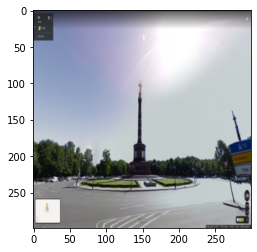

In [18]:
img = tf.keras.preprocessing.image.load_img( input_o , color_mode='rgb', target_size=(299,299), interpolation='bilinear' )
plt.imshow(img)
plt.show()



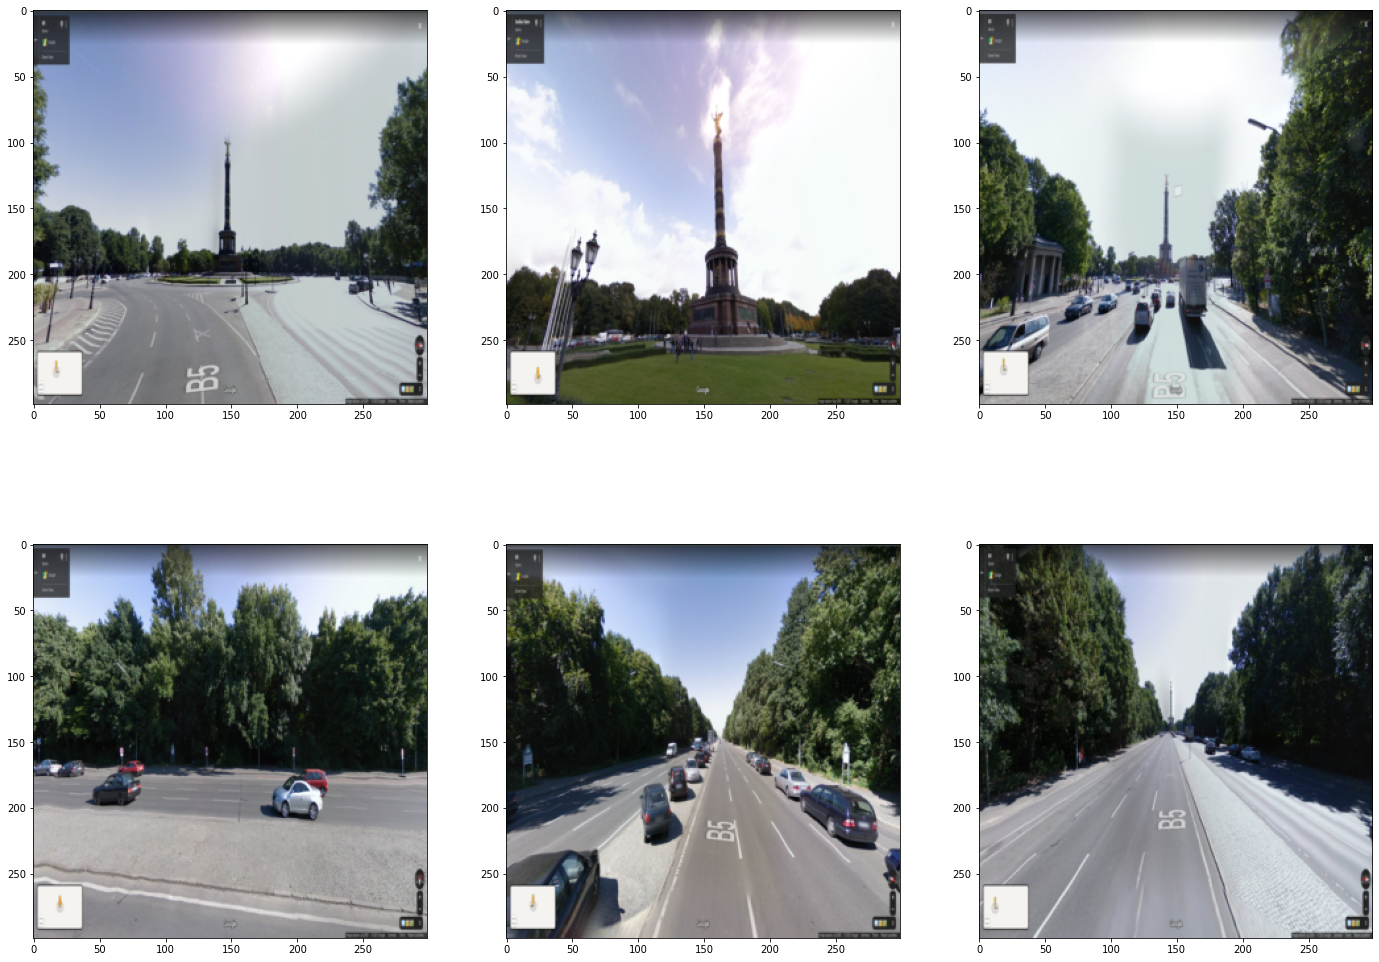

In [20]:

fig=plt.figure(figsize=(24, 18))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = tf.keras.preprocessing.image.load_img( inputs[i-1] , color_mode='rgb', target_size=(299,299), interpolation='bilinear' )
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()
    

In [21]:
def process( model, in_image ):
    img = tf.keras.preprocessing.image.load_img( in_image , color_mode='rgb', target_size=(299,299), interpolation='bilinear' )
    
    #plt.imshow(img)
    #plt.show()

    img = tf.keras.preprocessing.image.img_to_array( img, dtype = np.float32 )    
    img = tf.expand_dims(img, axis=0)
    img = tf.keras.applications.xception.preprocess_input( img )
    logits = model.predict( img )[0]
    return logits    

In [22]:

for op_p in [None, 'avg', 'max']:    
    model = tf.keras.applications.Xception(input_shape=(299,299,3), include_top=False, weights='imagenet', pooling=op_p)

    logits = process( model, input_o )

    logits_res=[]
    for i in inputs:
        logits_res.append( process( model, i ) )
    

    ###### https://stackoverflow.com/questions/45583472/how-to-find-the-difference-between-two-matrices-in-python-with-the-result-should
    #distance = np.linalg.norm(logits - logits_res[i])
    #distance = logits @ logits.T
    #print( op_p, -1, distance )

    for i in range( len(logits_res) ):
        distance = np.linalg.norm(logits - logits_res[i])
        #distance = logits @ logits_res[i].T
        print( op_p, i, distance )


None 0 146.99007
None 1 168.59444
None 2 198.59949
None 3 213.62662
None 4 212.3508
None 5 226.90356
avg 0 5.0868764
avg 1 6.6343894
avg 2 8.354538
avg 3 8.447386
avg 4 9.40878
avg 5 10.985932
max 0 32.93934
max 1 40.37008
max 2 48.837067
max 3 56.553226
max 4 52.850075
max 5 59.18808


In [23]:

#for i in range (1280):
    #diff = logits_res[0][:,:,i]-logits_res[1][:,:,i]
    #plt.imshow( diff, cmap='gray')
    #plt.show()
